In [293]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy

In [294]:
## Baseline simulator parameters
n_genes = 128
n_vaccines = 3 # DO NOT CHANGE, breaks the simulator.
n_treatments = 4
n_population = 10000
n_symptoms = 10
#batch_size = 2000

#assert n_population/batch_size == n_population//batch_size, 'the batch size must evenly divide the number of people'

In [295]:
population = Population(n_genes, n_vaccines, n_treatments)

In [296]:
X = population.generate(n_population)
n_features = X.shape[1]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [297]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

(array([2.360e+02, 8.300e+02, 1.286e+03, 1.426e+03, 1.408e+03, 1.234e+03,
        9.230e+02, 7.930e+02, 5.470e+02, 4.160e+02, 2.950e+02, 1.930e+02,
        1.380e+02, 8.300e+01, 5.600e+01, 4.700e+01, 3.000e+01, 1.900e+01,
        1.500e+01, 7.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.50783412,   6.45036121,  12.39288831,  18.33541541,
         24.2779425 ,  30.2204696 ,  36.1629967 ,  42.10552379,
         48.04805089,  53.99057799,  59.93310508,  65.87563218,
         71.81815927,  77.76068637,  83.70321347,  89.64574056,
         95.58826766, 101.53079476, 107.47332185, 113.41584895,
        119.35837605, 125.30090314, 131.24343024, 137.18595734,
        143.12848443, 149.07101153, 155.01353862, 160.95606572,
        166.89859282, 172.84111991, 178.78364701]),
 <BarContainer object of 30 artists>)

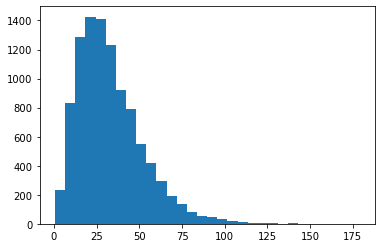

In [298]:
plt.hist(X[:,10], bins=30)

(array([2.990e+03, 2.165e+03, 1.434e+03, 9.890e+02, 7.340e+02, 5.240e+02,
        3.670e+02, 2.660e+02, 1.530e+02, 1.120e+02, 9.600e+01, 5.500e+01,
        4.400e+01, 2.300e+01, 1.600e+01, 1.100e+01, 4.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.35839778e+00, 3.57817122e+03, 7.15398405e+03, 1.07297969e+04,
        1.43056097e+04, 1.78814225e+04, 2.14572354e+04, 2.50330482e+04,
        2.86088610e+04, 3.21846738e+04, 3.57604867e+04, 3.93362995e+04,
        4.29121123e+04, 4.64879251e+04, 5.00637380e+04, 5.36395508e+04,
        5.72153636e+04, 6.07911764e+04, 6.43669893e+04, 6.79428021e+04,
        7.15186149e+04, 7.50944277e+04, 7.86702406e+04, 8.22460534e+04,
        8.58218662e+04, 8.93976790e+04, 9.29734919e+04, 9.65493047e+04,
        1.00125118e+05, 1.03700930e+05, 1.07276743e+05]),
 <BarContainer object of 30 artists>)

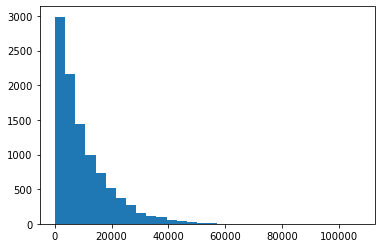

In [299]:
plt.hist(X[:,12], bins=30)

In [300]:
def u(x, value):
    
    v_cnts = np.unique(x, return_counts=True)

    return v_cnts[1][value] / v_cnts[1].sum()
    
def exponential(x, R, u, sensitivity, epsilon, n=1):
    scores = u(x, R) # score each element in R
    probs = np.exp(epsilon*scores / 2 / sensitivity)
    probs /= probs.sum()
    return np.random.choice(R, n, p=probs)

X_new = np.zeros((n_population, n_features))

for i in range(n_features):
    leng = len(np.unique(X[:,i].astype(int)))
    e = exponential(X[:,i].astype(int), np.arange(0,leng), u, 1, 100, n=n_population)
    
    X_new[:,i] = e

print(np.shape(X))
print(np.shape(X_new))

(10000, 150)
(10000, 150)


(array([276., 321., 447., 723., 603., 661., 788., 520., 451., 355., 450.,
        291., 265., 305., 244., 223., 309., 216., 198., 208., 248., 185.,
        201., 241., 220., 183., 249., 207., 184., 228.]),
 array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
         38.7,  43. ,  47.3,  51.6,  55.9,  60.2,  64.5,  68.8,  73.1,
         77.4,  81.7,  86. ,  90.3,  94.6,  98.9, 103.2, 107.5, 111.8,
        116.1, 120.4, 124.7, 129. ]),
 <BarContainer object of 30 artists>)

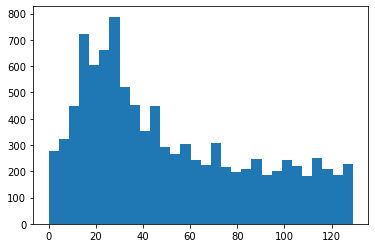

In [302]:
plt.hist(X_new[:,10],bins=30)